Dictionary
date  date of the match 

home_team  the name of the home team 

away_team  the name of the away team 

home_score  full-time home team score including extra time, not including penalty-shootouts 

away_score  full-time away team score including extra time, not including penalty-shootouts 

tournament  the name of the tournament 

city  the name of the city/town/administrative unit where the match was played 

country  the name of the country where the match was played 

neutral  TRUE/FALSE column indicating whether the match was played at a neutral venue 


In [1]:
import pandas as pd
import re 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from typing import Optional, Union, Mapping

In [2]:
input_fn = 'football_data.csv'
VALID_DATE_OPTIONS = {'day', 'month', 'year'}

In [3]:
data = pd.read_csv(input_fn, sep='\t')
data

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
42364,27/06/2021,Venezuela,Peru,NaN,NaN,Copa Am√©rica,Brasilia,Brazil,True
42365,27/06/2021,El Salvador,Guatemala,NaN,NaN,Friendly,NaN,NaN,NaN
42366,28/06/2021,Argentina,Bolivia,NaN,NaN,Copa Am√©rica,Cuiaba,Brazil,True
42367,28/06/2021,Uruguay,Paraguay,NaN,NaN,Copa Am√©rica,Rio de Janeiro,Brazil,True


In [4]:
# split_datetime = re.split('-','1872-11-30')

In [5]:
def correct_date(value):
    split_datetime = re.split('-',value)
    if len(split_datetime) == 3: 
        yyyy, mm, dd  = split_datetime
        return '{0}/{1}/{2}'.format(dd, mm, yyyy)
    else:
        return value

In [6]:
def set_year(value, option:str='year'):
    split_datetime = re.split('/',value)
    if option not in VALID_DATE_OPTIONS:
        raise ValueError("option must be of type" % VALID_DATE_OPTIONS)
    dd, mm, yyyy  = split_datetime
    if option == 'year': 
        return yyyy
    elif option == 'month':
        return mm
    else:
        return dd

In [90]:
def plot_cluster_proportions(props_mat, 
                             cluster_palette=None,
                             xlabel_rotation=0, ncolumn=1,bar_kind='bar', x_col = None,
                             y_col='Proportion', figsize=(12, 6),fn=None): 
    fig, ax = plt.subplots(dpi=300, figsize=figsize)
    fig.patch.set_facecolor("white")
    cmap = None
    if cluster_palette is not None:
        cmap = sns.palettes.blend_palette(
            cluster_palette, 
            n_colors=len(cluster_palette), 
            as_cmap=True)
   
    props_mat.plot(
        kind=bar_kind, 
        stacked=True, 
        ax=ax, 
        legend=None, 
        colormap=cmap
    )
    
    lgd = ax.legend(bbox_to_anchor=(1.01, 1),  ncol=ncolumn,frameon=False, title="Result")
    sns.despine(fig, ax)
    
    ax.tick_params(axis="x", rotation=xlabel_rotation)
    if not x_col:
        ax.set_xlabel(props_mat.index.name.capitalize())
    else:
        ax.set_xlabel(x_col, fontsize=16)
    ax.set_ylabel(y_col)
    fig.tight_layout()
    if fn is not None:
        fig.savefig(fn,bbox_extra_artists=(lgd,), bbox_inches='tight')
    return fig

In [7]:
data.date = data.date.apply(correct_date)
data

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,30/11/1872,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,08/03/1873,England,Scotland,4.0,2.0,Friendly,London,England,False
2,07/03/1874,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,06/03/1875,England,Scotland,2.0,2.0,Friendly,London,England,False
4,04/03/1876,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
42364,27/06/2021,Venezuela,Peru,NaN,NaN,Copa Am√©rica,Brasilia,Brazil,True
42365,27/06/2021,El Salvador,Guatemala,NaN,NaN,Friendly,NaN,NaN,NaN
42366,28/06/2021,Argentina,Bolivia,NaN,NaN,Copa Am√©rica,Cuiaba,Brazil,True
42367,28/06/2021,Uruguay,Paraguay,NaN,NaN,Copa Am√©rica,Rio de Janeiro,Brazil,True


In [8]:
print('home_team',len(data.home_team.unique()))
print('away_team',len(data.away_team.unique()))
print('home_score',len(data.home_score.unique()))
print('away_score',len(data.away_score.unique()))
print('tournament',len(data.tournament.unique()))
print('away_team',len(data.away_team.unique()))
print('city', len(data.city.unique()))
print('country',len(data.country.unique()))


home_team 309
away_team 306
home_score 27
away_score 23
tournament 112
away_team 306
city 2051
country 267


In [9]:
data.describe()

,home_score,away_score
count,42353.000000,42353.000000
mean,1.744245,1.185843
std,1.753657,1.404751
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


## Question 1:

Analysis the performance of England & Canada team by historical Football Results (See Dataset)

In [303]:
shorlisted = ['England']

performance_shortlisted = data[data.home_team.isin(shorlisted) | data.away_team.isin(shorlisted)]
performance_shortlisted['team'] = 'England'
performance_shortlisted

/var/folders/vg/5bs8jwp12m5fw8pn1np6jb6m0000gr/T/ipykernel_1021/3979986655.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  performance_shortlisted['team'] = 'England'


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,team
0,30/11/1872,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,England
1,08/03/1873,England,Scotland,4.0,2.0,Friendly,London,England,False,England
2,07/03/1874,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,England
3,06/03/1875,England,Scotland,2.0,2.0,Friendly,London,England,False,England
4,04/03/1876,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,England
...,...,...,...,...,...,...,...,...,...,...
42129,02/06/2021,England,Austria,1.0,0.0,Friendly,London,England,False,England
42203,06/06/2021,England,Romania,1.0,0.0,Friendly,London,England,False,England
42296,13/06/2021,England,Croatia,1.0,0.0,UEFA Euro,London,England,False,England
42336,18/06/2021,England,Scotland,0.0,0.0,UEFA Euro,London,England,False,England


In [304]:
performance_shortlisted['month'] = performance_shortlisted.date.apply(set_year,option='month')
performance_shortlisted['day'] = performance_shortlisted.date.apply(set_year,option='day')
performance_shortlisted['year'] = performance_shortlisted.date.apply(set_year,option='year')
performance_shortlisted

/var/folders/vg/5bs8jwp12m5fw8pn1np6jb6m0000gr/T/ipykernel_1021/2722240424.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  performance_shortlisted['month'] = performance_shortlisted.date.apply(set_year,option='month')
/var/folders/vg/5bs8jwp12m5fw8pn1np6jb6m0000gr/T/ipykernel_1021/2722240424.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  performance_shortlisted['day'] = performance_shortlisted.date.apply(set_year,option='day')
/var/folders/vg/5bs8jwp12m5fw8pn1np6jb6m0000gr/T/ipykernel_1021/27222404

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,team,month,day,year
0,30/11/1872,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,England,11,30,1872
1,08/03/1873,England,Scotland,4.0,2.0,Friendly,London,England,False,England,03,08,1873
2,07/03/1874,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,England,03,07,1874
3,06/03/1875,England,Scotland,2.0,2.0,Friendly,London,England,False,England,03,06,1875
4,04/03/1876,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,England,03,04,1876
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42129,02/06/2021,England,Austria,1.0,0.0,Friendly,London,England,False,England,06,02,2021
42203,06/06/2021,England,Romania,1.0,0.0,Friendly,London,England,False,England,06,06,2021
42296,13/06/2021,England,Croatia,1.0,0.0,UEFA Euro,London,England,False,England,06,13,2021
42336,18/06/2021,England,Scotland,0.0,0.0,UEFA Euro,London,England,False,England,06,18,2021


In [305]:
performance_shortlisted = performance_shortlisted.dropna()
performance_shortlisted

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,team,month,day,year
0,30/11/1872,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,England,11,30,1872
1,08/03/1873,England,Scotland,4.0,2.0,Friendly,London,England,False,England,03,08,1873
2,07/03/1874,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,England,03,07,1874
3,06/03/1875,England,Scotland,2.0,2.0,Friendly,London,England,False,England,03,06,1875
4,04/03/1876,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,England,03,04,1876
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42097,31/03/2021,England,Poland,2.0,1.0,FIFA World Cup qualification,London,England,False,England,03,31,2021
42129,02/06/2021,England,Austria,1.0,0.0,Friendly,London,England,False,England,06,02,2021
42203,06/06/2021,England,Romania,1.0,0.0,Friendly,London,England,False,England,06,06,2021
42296,13/06/2021,England,Croatia,1.0,0.0,UEFA Euro,London,England,False,England,06,13,2021


In [306]:
performance_shortlisted['final_result'] = 'Draw'

/var/folders/vg/5bs8jwp12m5fw8pn1np6jb6m0000gr/T/ipykernel_1021/825750060.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  performance_shortlisted['final_result'] = 'Draw'


In [307]:
performance_shortlisted['goal'] = 0

/var/folders/vg/5bs8jwp12m5fw8pn1np6jb6m0000gr/T/ipykernel_1021/1412581386.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  performance_shortlisted['goal'] = 0


In [308]:
performance_shortlisted

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,team,month,day,year,final_result,goal
0,30/11/1872,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,England,11,30,1872,Draw,0
1,08/03/1873,England,Scotland,4.0,2.0,Friendly,London,England,False,England,03,08,1873,Draw,0
2,07/03/1874,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,England,03,07,1874,Draw,0
3,06/03/1875,England,Scotland,2.0,2.0,Friendly,London,England,False,England,03,06,1875,Draw,0
4,04/03/1876,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,England,03,04,1876,Draw,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42097,31/03/2021,England,Poland,2.0,1.0,FIFA World Cup qualification,London,England,False,England,03,31,2021,Draw,0
42129,02/06/2021,England,Austria,1.0,0.0,Friendly,London,England,False,England,06,02,2021,Draw,0
42203,06/06/2021,England,Romania,1.0,0.0,Friendly,London,England,False,England,06,06,2021,Draw,0
42296,13/06/2021,England,Croatia,1.0,0.0,UEFA Euro,London,England,False,England,06,13,2021,Draw,0


In [309]:
# np.where(performance_shortlisted.team == performance_shortlisted.home_team,
#                                         performance_shortlisted.home_score, performance_shortlisted.away_score).shape

In [310]:
performance_shortlisted.goal = np.where(performance_shortlisted.team == performance_shortlisted.home_team,
                                        performance_shortlisted.home_score, performance_shortlisted.away_score)


performance_shortlisted

/var/folders/vg/5bs8jwp12m5fw8pn1np6jb6m0000gr/T/ipykernel_1021/417490390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  performance_shortlisted.goal = np.where(performance_shortlisted.team == performance_shortlisted.home_team,


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,team,month,day,year,final_result,goal
0,30/11/1872,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,England,11,30,1872,Draw,0.0
1,08/03/1873,England,Scotland,4.0,2.0,Friendly,London,England,False,England,03,08,1873,Draw,4.0
2,07/03/1874,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,England,03,07,1874,Draw,1.0
3,06/03/1875,England,Scotland,2.0,2.0,Friendly,London,England,False,England,03,06,1875,Draw,2.0
4,04/03/1876,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,England,03,04,1876,Draw,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42097,31/03/2021,England,Poland,2.0,1.0,FIFA World Cup qualification,London,England,False,England,03,31,2021,Draw,2.0
42129,02/06/2021,England,Austria,1.0,0.0,Friendly,London,England,False,England,06,02,2021,Draw,1.0
42203,06/06/2021,England,Romania,1.0,0.0,Friendly,London,England,False,England,06,06,2021,Draw,1.0
42296,13/06/2021,England,Croatia,1.0,0.0,UEFA Euro,London,England,False,England,06,13,2021,Draw,1.0


In [311]:
performance_shortlisted.loc[(performance_shortlisted.home_team==performance_shortlisted.team) &  
                            (performance_shortlisted.home_score > performance_shortlisted.away_score), 
                            'final_result'] = 'Won'
performance_shortlisted.loc[(performance_shortlisted.home_team==performance_shortlisted.team) &
                            (performance_shortlisted.home_score < performance_shortlisted.away_score), 
                            'final_result'] = 'Lost'
performance_shortlisted.loc[(performance_shortlisted.away_team==performance_shortlisted.team) &  
                            (performance_shortlisted.home_score > performance_shortlisted.away_score), 
                            'final_result'] = 'Lost'
performance_shortlisted.loc[(performance_shortlisted.away_team==performance_shortlisted.team) &
                            (performance_shortlisted.home_score < performance_shortlisted.away_score), 
                            'final_result'] = 'Won'


In [312]:
performance_shortlisted
                                                  

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,team,month,day,year,final_result,goal
0,30/11/1872,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,England,11,30,1872,Draw,0.0
1,08/03/1873,England,Scotland,4.0,2.0,Friendly,London,England,False,England,03,08,1873,Won,4.0
2,07/03/1874,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,England,03,07,1874,Lost,1.0
3,06/03/1875,England,Scotland,2.0,2.0,Friendly,London,England,False,England,03,06,1875,Draw,2.0
4,04/03/1876,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,England,03,04,1876,Lost,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42097,31/03/2021,England,Poland,2.0,1.0,FIFA World Cup qualification,London,England,False,England,03,31,2021,Won,2.0
42129,02/06/2021,England,Austria,1.0,0.0,Friendly,London,England,False,England,06,02,2021,Won,1.0
42203,06/06/2021,England,Romania,1.0,0.0,Friendly,London,England,False,England,06,06,2021,Won,1.0
42296,13/06/2021,England,Croatia,1.0,0.0,UEFA Euro,London,England,False,England,06,13,2021,Won,1.0


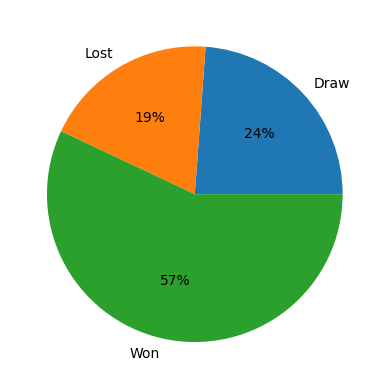

In [313]:
general_result = performance_shortlisted.groupby(['final_result']).count().reset_index() 
# general_result.apply(lambda x: 100 * x / x.sum()).reset_index() 
general_result
plt.pie(general_result['goal'], labels=general_result['final_result'],autopct='%.0f%%')

plt.savefig('Canada_pie_chart.png')
plt.show()
# general_result
# props = sizes.groupby('tournament').apply(lambda x: 100 * x / x.sum()).reset_index() 

In [314]:
performance_shortlisted

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,team,month,day,year,final_result,goal
0,30/11/1872,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,England,11,30,1872,Draw,0.0
1,08/03/1873,England,Scotland,4.0,2.0,Friendly,London,England,False,England,03,08,1873,Won,4.0
2,07/03/1874,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,England,03,07,1874,Lost,1.0
3,06/03/1875,England,Scotland,2.0,2.0,Friendly,London,England,False,England,03,06,1875,Draw,2.0
4,04/03/1876,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,England,03,04,1876,Lost,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42097,31/03/2021,England,Poland,2.0,1.0,FIFA World Cup qualification,London,England,False,England,03,31,2021,Won,2.0
42129,02/06/2021,England,Austria,1.0,0.0,Friendly,London,England,False,England,06,02,2021,Won,1.0
42203,06/06/2021,England,Romania,1.0,0.0,Friendly,London,England,False,England,06,06,2021,Won,1.0
42296,13/06/2021,England,Croatia,1.0,0.0,UEFA Euro,London,England,False,England,06,13,2021,Won,1.0


In [315]:
sizes = performance_shortlisted.groupby(['tournament','final_result']).size()
props = sizes.groupby('tournament').apply(lambda x: 100 * x / x.sum()).reset_index() 
props = props.pivot(columns='final_result', index='tournament').T
props.index = props.index.droplevel(0)
props.fillna(0, inplace=True)
props_mat = props.T
props_mat

/var/folders/vg/5bs8jwp12m5fw8pn1np6jb6m0000gr/T/ipykernel_1021/2863994384.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  props = sizes.groupby('tournament').apply(lambda x: 100 * x / x.sum()).reset_index()


final_result,Draw,Lost,Won
tournament,,,
British Championship,21.653543,18.897638,59.448819
FIFA World Cup,30.434783,27.536232,42.028986
FIFA World Cup qualification,21.739130,9.565217,68.695652
Friendly,23.515439,21.377672,55.106888
King Hassan II Tournament,50.000000,0.000000,50.000000
Rous Cup,50.000000,12.500000,37.500000
Tournoi de France,0.000000,33.333333,66.666667
UEFA Euro,36.363636,30.303030,33.333333
UEFA Euro qualification,22.222222,10.185185,67.592593


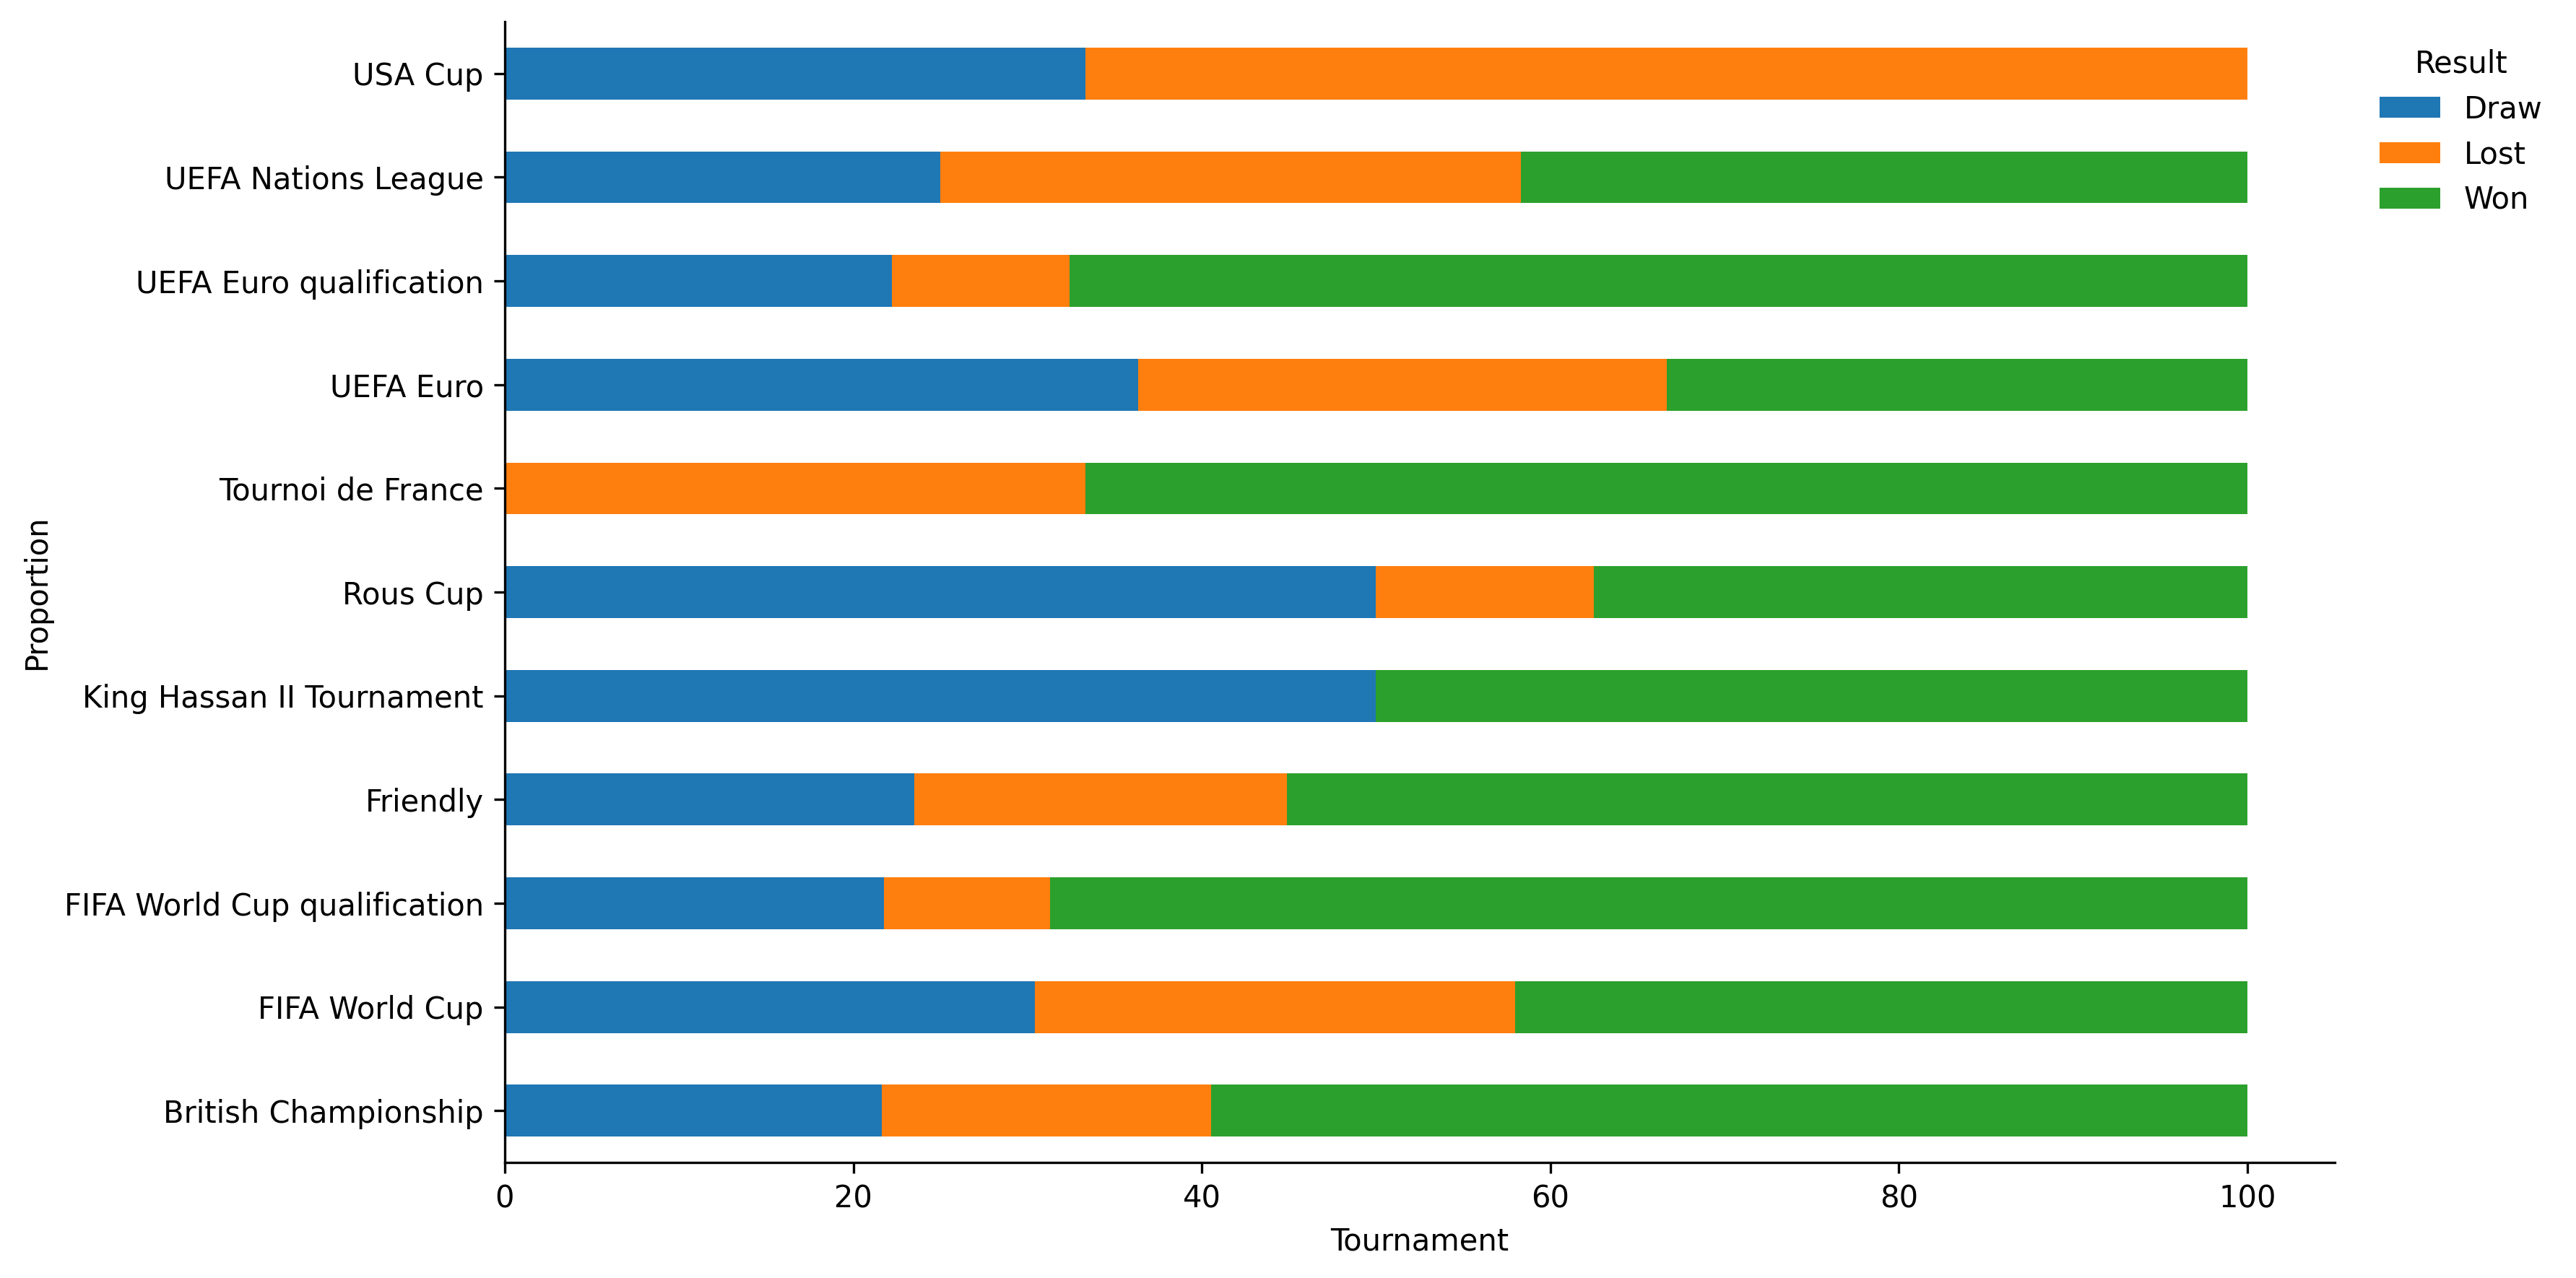

In [316]:
fig_prob = plot_cluster_proportions(props_mat, xlabel_rotation=0, bar_kind='barh',fn='Canada_tournament_stat.png')
plt.show()


In [317]:
performance_shortlisted.groupby(['tournament','final_result','goal']).size().reset_index() 

,tournament,final_result,goal,0
0,British Championship,Draw,0.0,11
1,British Championship,Draw,1.0,28
2,British Championship,Draw,2.0,13
3,British Championship,Draw,3.0,3
4,British Championship,Lost,0.0,19
...,...,...,...,...
104,UEFA Nations League,Won,3.0,1
105,UEFA Nations League,Won,4.0,1
106,USA Cup,Draw,1.0,1
107,USA Cup,Lost,0.0,1


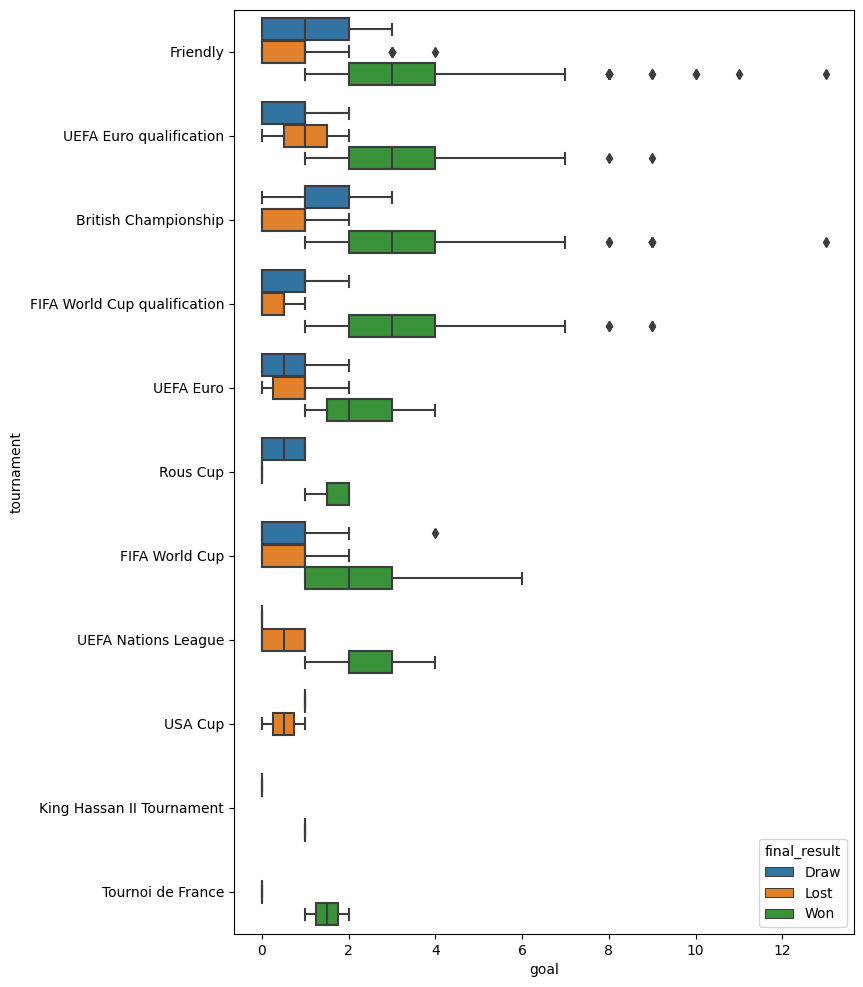

In [318]:
fig = plt.figure(figsize=(8, 12))
goal_stat = performance_shortlisted.sort_values('final_result', ascending=True)
# sns.boxplot(x='Epithelial', y='CHR_17P_DEL', data=merged_props)
plt.rcParams.update({'font.size': 10})
sns.boxplot(x='goal', y='tournament',hue='final_result', data=goal_stat)
fig.savefig('Canada_tournament_goal_by_result.png',bbox_inches = 'tight')

In [319]:
performance_shortlisted['opponent'] = ''

/var/folders/vg/5bs8jwp12m5fw8pn1np6jb6m0000gr/T/ipykernel_1021/2117301874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  performance_shortlisted['opponent'] = ''


In [320]:
performance_shortlisted.opponent = np.where(performance_shortlisted.team == performance_shortlisted.home_team,
                                        performance_shortlisted.away_team, performance_shortlisted.home_team)


performance_shortlisted

/var/folders/vg/5bs8jwp12m5fw8pn1np6jb6m0000gr/T/ipykernel_1021/1945228278.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  performance_shortlisted.opponent = np.where(performance_shortlisted.team == performance_shortlisted.home_team,


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,team,month,day,year,final_result,goal,opponent
0,30/11/1872,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,England,11,30,1872,Draw,0.0,Scotland
1,08/03/1873,England,Scotland,4.0,2.0,Friendly,London,England,False,England,03,08,1873,Won,4.0,Scotland
2,07/03/1874,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,England,03,07,1874,Lost,1.0,Scotland
3,06/03/1875,England,Scotland,2.0,2.0,Friendly,London,England,False,England,03,06,1875,Draw,2.0,Scotland
4,04/03/1876,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,England,03,04,1876,Lost,0.0,Scotland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42097,31/03/2021,England,Poland,2.0,1.0,FIFA World Cup qualification,London,England,False,England,03,31,2021,Won,2.0,Poland
42129,02/06/2021,England,Austria,1.0,0.0,Friendly,London,England,False,England,06,02,2021,Won,1.0,Austria
42203,06/06/2021,England,Romania,1.0,0.0,Friendly,London,England,False,England,06,06,2021,Won,1.0,Romania
42296,13/06/2021,England,Croatia,1.0,0.0,UEFA Euro,London,England,False,England,06,13,2021,Won,1.0,Croatia


In [321]:
len(performance_shortlisted.opponent.unique())

84

In [178]:
sizes = performance_shortlisted.groupby(['opponent','final_result']).size()
props2 = sizes.groupby('opponent').apply(lambda x: 100 * x / x.sum()).reset_index() 
props2 = props2.pivot(columns='final_result', index='opponent').T
props2.index = props2.index.droplevel(0)
props2.fillna(0, inplace=True)
props_mat2 = props2.T
props_mat2

/var/folders/vg/5bs8jwp12m5fw8pn1np6jb6m0000gr/T/ipykernel_1021/263629231.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  props2 = sizes.groupby('opponent').apply(lambda x: 100 * x / x.sum()).reset_index()


final_result,Draw,Lost,Won
opponent,,,
Algeria,0.000000,100.000000,0.000000
Argentina,0.000000,100.000000,0.000000
Armenia,0.000000,100.000000,0.000000
Aruba,0.000000,0.000000,100.000000
Australia,11.111111,55.555556,33.333333
...,...,...,...
United States Virgin Islands,0.000000,0.000000,100.000000
Uruguay,0.000000,100.000000,0.000000
Uzbekistan,0.000000,0.000000,100.000000


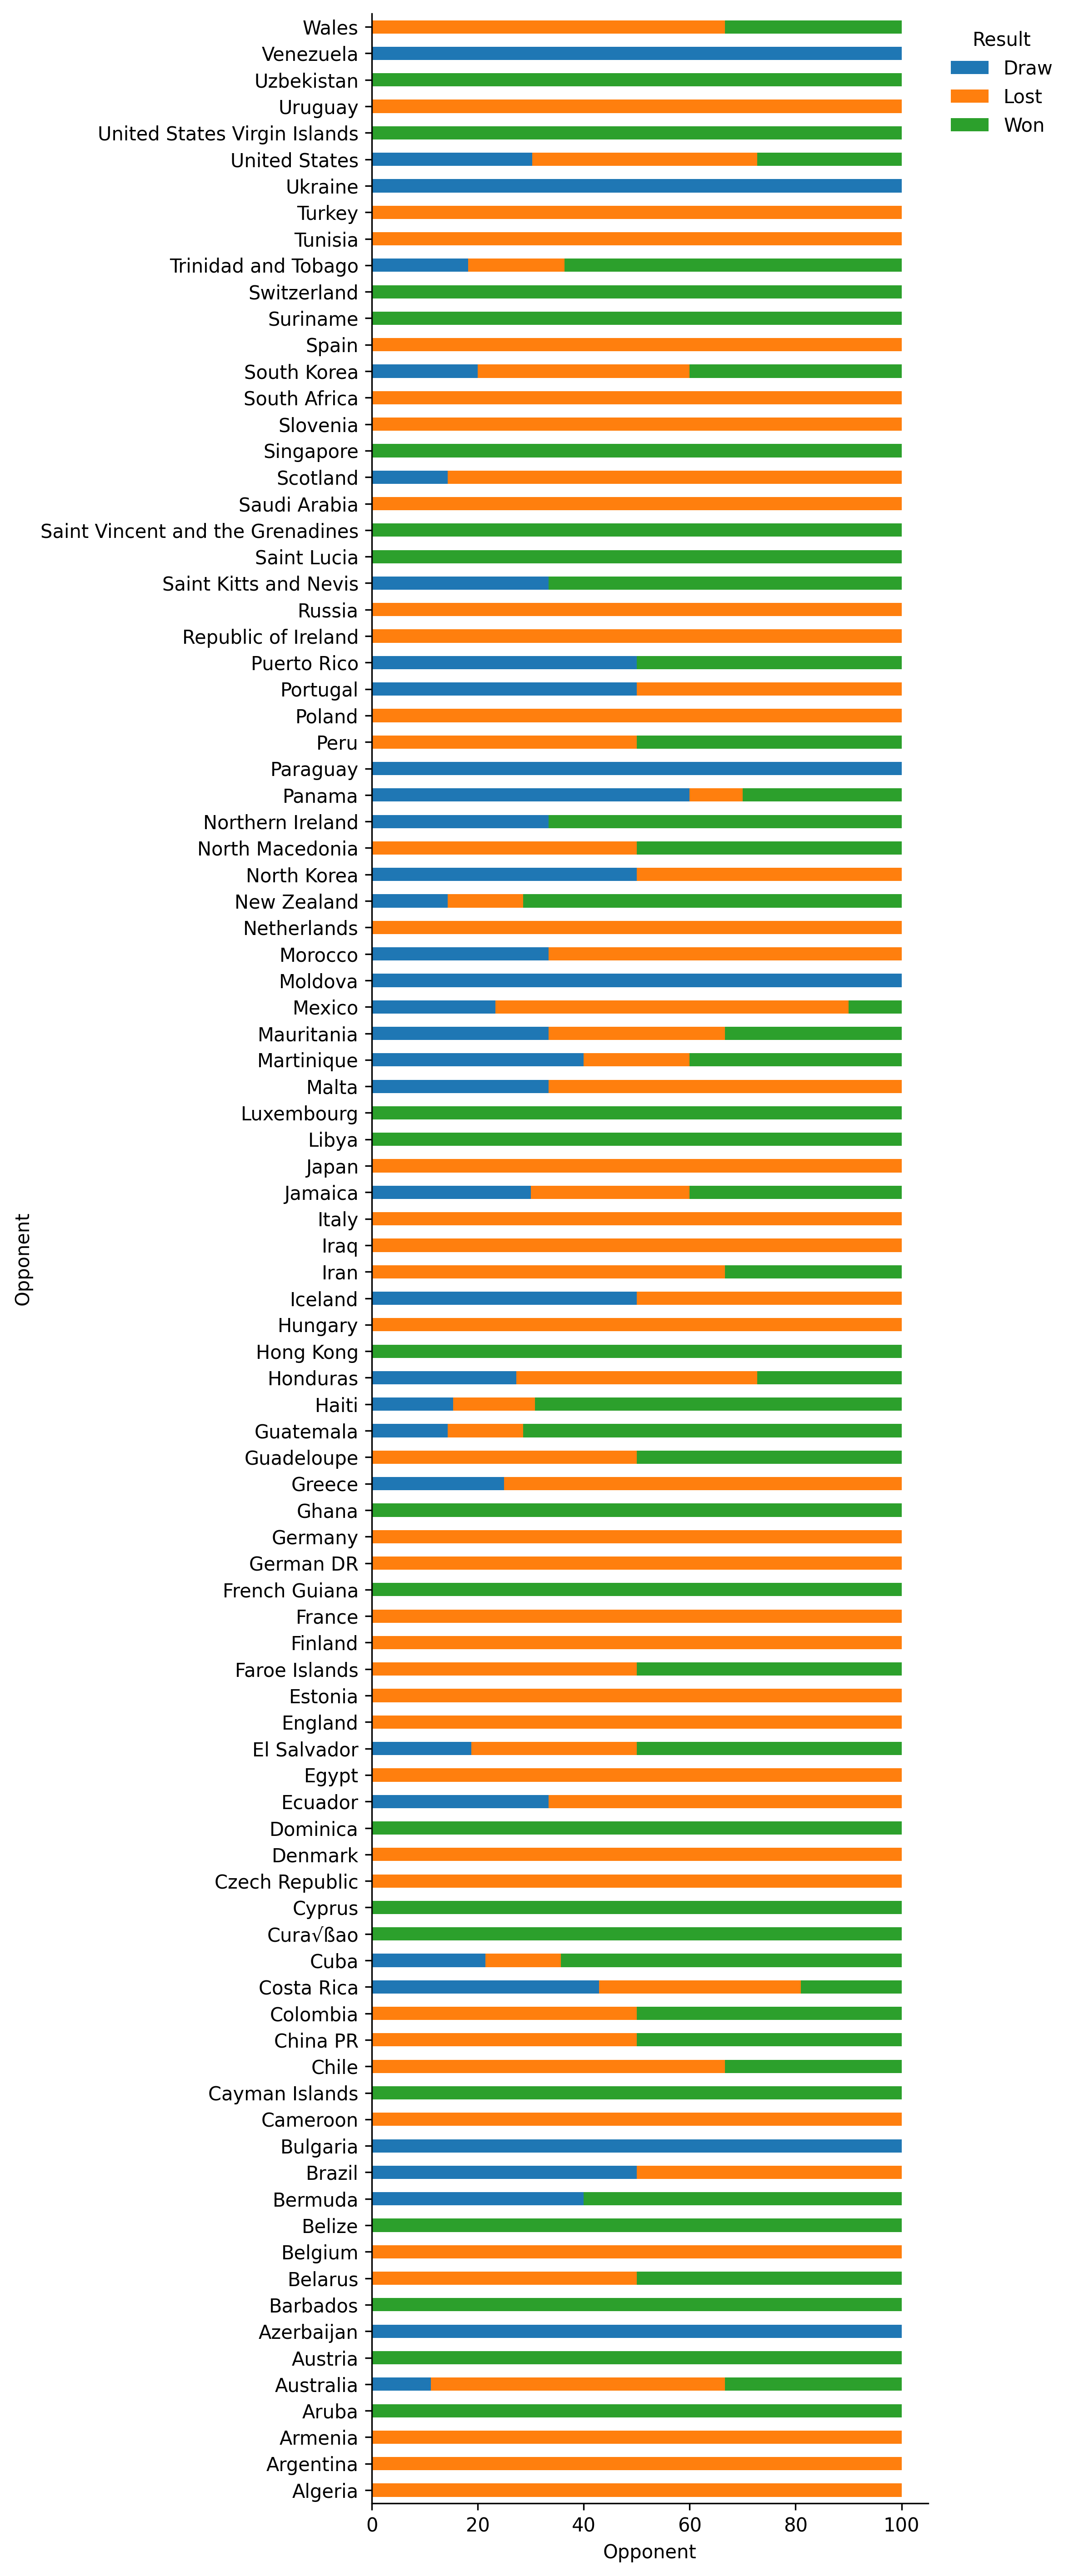

In [179]:
# fig = plt.figure(figsize=(8, 19))

fig_prob2 = plot_cluster_proportions(props_mat2, bar_kind='barh', 
                                     y_col='Opponent', figsize=(8, 19), 
                                     fn='Canada_versus_oponent_stat.png')
# fig_prob2
# plt.rcParams.update({'font.size': 10})
plt.show()

In [322]:
box_plot_data = performance_shortlisted.groupby(['opponent','final_result', 'goal']).size().reset_index() 
box_plot_data = box_plot_data.sort_values('opponent', ascending=False)
# box_plot_data

In [323]:
box_plot_data

,opponent,final_result,goal,0
444,Yugoslavia,Won,4.0,1
443,Yugoslavia,Won,3.0,1
442,Yugoslavia,Won,2.0,3
441,Yugoslavia,Lost,1.0,1
440,Yugoslavia,Lost,0.0,3
...,...,...,...,...
4,Andorra,Won,2.0,1
3,Algeria,Draw,0.0,1
2,Albania,Won,5.0,1
1,Albania,Won,3.0,1


In [265]:
len(box_plot_data.opponent.unique())

94

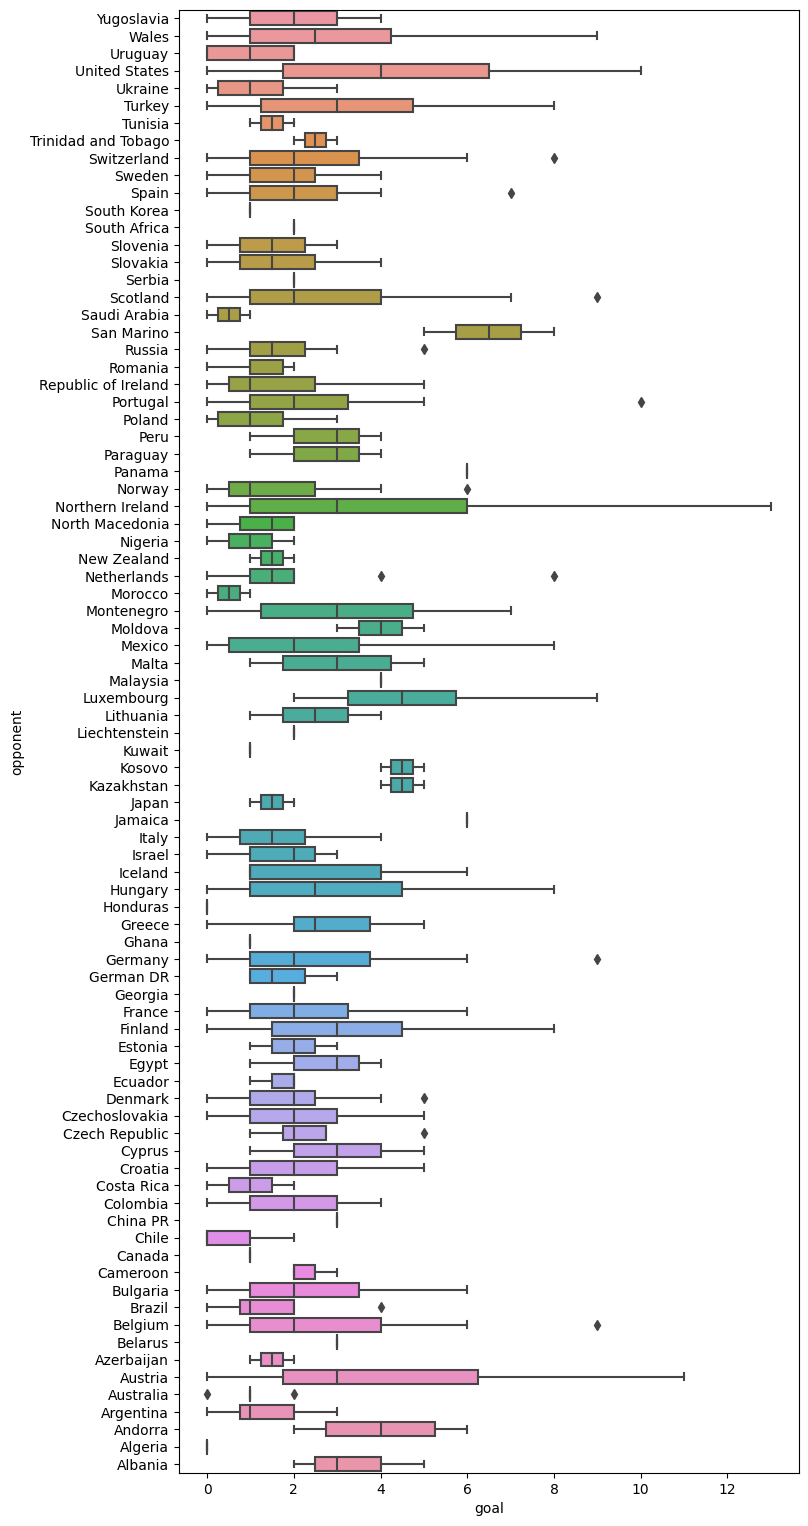

In [324]:
fig = plt.figure(figsize=(8, 19))
# sns.boxplot(x='Epithelial', y='CHR_17P_DEL', data=merged_props)
plt.rcParams.update({'font.size': 10})
sns.boxplot(x='goal', y='opponent', data=box_plot_data)
fig.savefig('England_goal_boxplot.png', bbox_inches = 'tight')

In [183]:
box_plot_data[box_plot_data.opponent == 'England']

,opponent,final_result,goal,0
72,England,Lost,0.0,1


In [184]:
performance_shortlisted[performance_shortlisted.opponent == 'England']

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,team,month,day,year,final_result,goal,opponent
14207,24/05/1986,Canada,England,0.0,1.0,Friendly,Burnaby,Canada,False,Canada,05,24,1986,Lost,0.0,England


In [185]:
print(len(performance_shortlisted.year.unique()))
performance_shortlisted.year.unique()

57


array(['1885', '1886', '1888', '1921', '1924', '1925', '1926', '1927',
       '1957', '1968', '1972', '1973', '1974', '1975', '1976', '1977',
       '1980', '1981', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021'], dtype=object)

In [186]:
performance_by_year = performance_shortlisted.groupby(['year','final_result','goal']).size().reset_index() 
performance_by_year

,year,final_result,goal,0
0,1885,Won,1.0,1
1,1886,Lost,2.0,1
2,1888,Lost,0.0,1
3,1921,Lost,0.0,1
4,1924,Draw,0.0,1
...,...,...,...,...
234,2021,Won,3.0,1
235,2021,Won,4.0,1
236,2021,Won,5.0,1
237,2021,Won,7.0,1


In [187]:
year_stat

,year,final_result,goal,0
0,1872,Draw,0.0,1
1,1873,Won,4.0,1
2,1874,Lost,1.0,1
3,1875,Draw,2.0,1
4,1876,Lost,0.0,1
...,...,...,...,...
703,2020,Won,1.0,1
708,2021,Won,1.0,3
709,2021,Won,2.0,2
707,2021,Draw,0.0,1


<AxesSubplot: xlabel='goal', ylabel='year'>

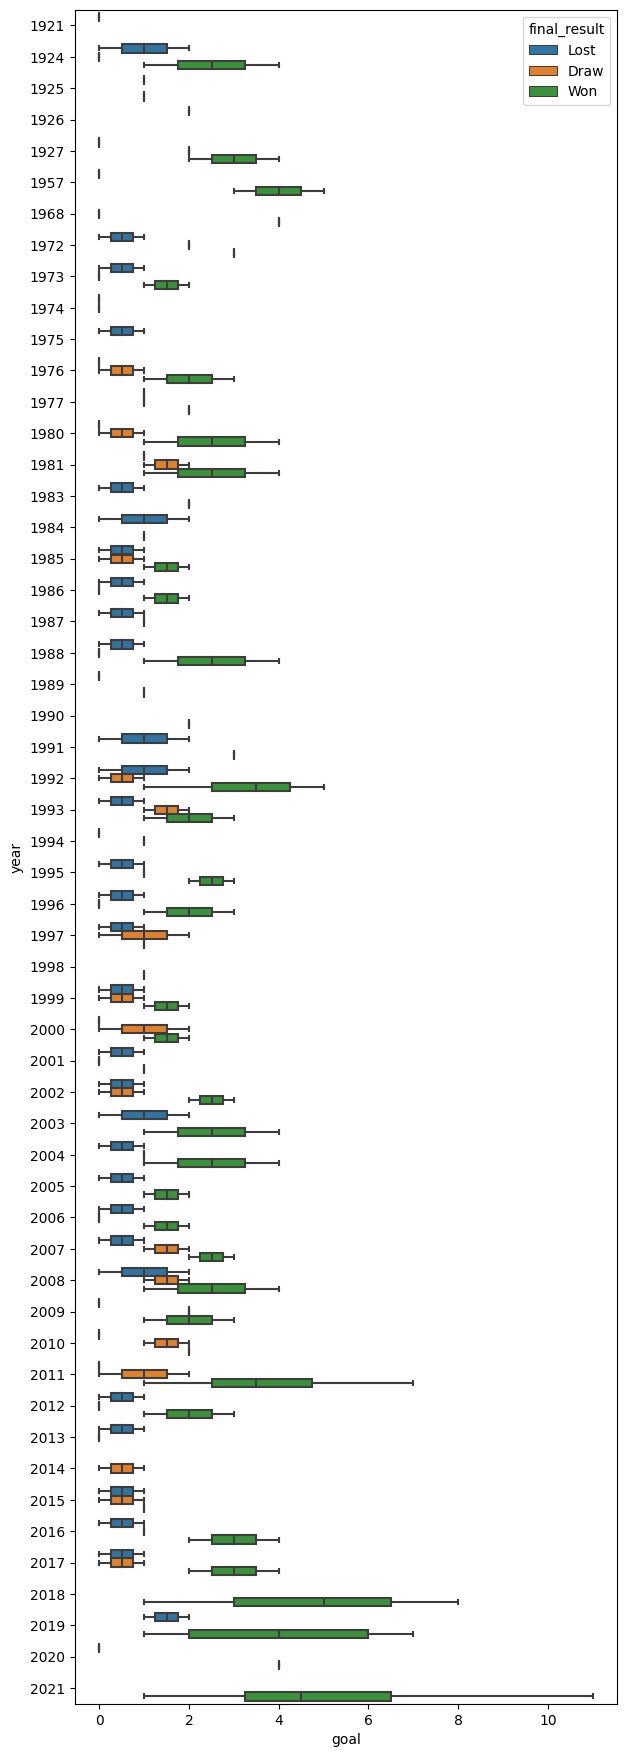

In [188]:
fig = plt.figure(figsize=(7, 22))
year_stat = performance_by_year.sort_values('year', ascending=True)
# sns.boxplot(x='Epithelial', y='CHR_17P_DEL', data=merged_props)
# plt.rcParams.update({'font.size': 10})
sns.boxplot(x='goal', y='year',hue='final_result', data=year_stat[year_stat.year > '1900'])
# fig.savefig('England_tournament_goal_by_result.png')

## Question 2:

What is the probability of match result England 2 - 1 Canada in 30 Dec 2021?

In [189]:
data

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,30/11/1872,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,08/03/1873,England,Scotland,4.0,2.0,Friendly,London,England,False
2,07/03/1874,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,06/03/1875,England,Scotland,2.0,2.0,Friendly,London,England,False
4,04/03/1876,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
42364,27/06/2021,Venezuela,Peru,NaN,NaN,Copa Am√©rica,Brasilia,Brazil,True
42365,27/06/2021,El Salvador,Guatemala,NaN,NaN,Friendly,NaN,NaN,NaN
42366,28/06/2021,Argentina,Bolivia,NaN,NaN,Copa Am√©rica,Cuiaba,Brazil,True
42367,28/06/2021,Uruguay,Paraguay,NaN,NaN,Copa Am√©rica,Rio de Janeiro,Brazil,True


In [ ]:
data

In [191]:
shorlisted = ['Canada', 'England']
performance_2teams = data[data.home_team.isin(shorlisted) | data.away_team.isin(shorlisted) ]
performance_2teams

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,30/11/1872,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,08/03/1873,England,Scotland,4.0,2.0,Friendly,London,England,False
2,07/03/1874,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,06/03/1875,England,Scotland,2.0,2.0,Friendly,London,England,False
4,04/03/1876,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
42282,12/06/2021,Haiti,Canada,0.0,1.0,FIFA World Cup qualification,Port au Prince,Haiti,False
42296,13/06/2021,England,Croatia,1.0,0.0,UEFA Euro,London,England,False
42319,15/06/2021,Canada,Haiti,3.0,0.0,FIFA World Cup qualification,Bridgeview,United States,True
42336,18/06/2021,England,Scotland,0.0,0.0,UEFA Euro,London,England,False


In [200]:
performance_2teams['month'] = performance_2teams.date.apply(set_year,option='month')
performance_2teams['day'] = performance_2teams.date.apply(set_year,option='day')
performance_2teams['year'] = performance_2teams.date.apply(set_year,option='year')
performance_2teams

/var/folders/vg/5bs8jwp12m5fw8pn1np6jb6m0000gr/T/ipykernel_1021/21437289.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  performance_2teams['month'] = performance_2teams.date.apply(set_year,option='month')
/var/folders/vg/5bs8jwp12m5fw8pn1np6jb6m0000gr/T/ipykernel_1021/21437289.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  performance_2teams['day'] = performance_2teams.date.apply(set_year,option='day')
/var/folders/vg/5bs8jwp12m5fw8pn1np6jb6m0000gr/T/ipykernel_1021/21437289.py:3: SettingWithCopyWa

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,month,day,year
0,30/11/1872,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,11,30,1872
1,08/03/1873,England,Scotland,4.0,2.0,Friendly,London,England,False,03,08,1873
2,07/03/1874,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,03,07,1874
3,06/03/1875,England,Scotland,2.0,2.0,Friendly,London,England,False,03,06,1875
4,04/03/1876,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,03,04,1876
...,...,...,...,...,...,...,...,...,...,...,...,...
42282,12/06/2021,Haiti,Canada,0.0,1.0,FIFA World Cup qualification,Port au Prince,Haiti,False,06,12,2021
42296,13/06/2021,England,Croatia,1.0,0.0,UEFA Euro,London,England,False,06,13,2021
42319,15/06/2021,Canada,Haiti,3.0,0.0,FIFA World Cup qualification,Bridgeview,United States,True,06,15,2021
42336,18/06/2021,England,Scotland,0.0,0.0,UEFA Euro,London,England,False,06,18,2021


In [208]:
performance_2teams['team'] = 'Target'
performance_2teams

/var/folders/vg/5bs8jwp12m5fw8pn1np6jb6m0000gr/T/ipykernel_1021/2323665900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  performance_2teams['team'] = 'Target'


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,month,day,year,team
0,30/11/1872,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,11,30,1872,Target
1,08/03/1873,England,Scotland,4.0,2.0,Friendly,London,England,False,03,08,1873,Target
2,07/03/1874,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,03,07,1874,Target
3,06/03/1875,England,Scotland,2.0,2.0,Friendly,London,England,False,03,06,1875,Target
4,04/03/1876,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,03,04,1876,Target
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42282,12/06/2021,Haiti,Canada,0.0,1.0,FIFA World Cup qualification,Port au Prince,Haiti,False,06,12,2021,Target
42296,13/06/2021,England,Croatia,1.0,0.0,UEFA Euro,London,England,False,06,13,2021,Target
42319,15/06/2021,Canada,Haiti,3.0,0.0,FIFA World Cup qualification,Bridgeview,United States,True,06,15,2021,Target
42336,18/06/2021,England,Scotland,0.0,0.0,UEFA Euro,London,England,False,06,18,2021,Target


In [222]:
performance_2teams['team'] = np.where(np.isin(performance_2teams.home_team, shorlisted),
                                        performance_2teams.home_team, 'test')
performance_2teams

/var/folders/vg/5bs8jwp12m5fw8pn1np6jb6m0000gr/T/ipykernel_1021/596736975.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  performance_2teams['team'] = np.where(np.isin(performance_2teams.home_team, shorlisted),


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,month,day,year,team
0,30/11/1872,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,11,30,1872,test
1,08/03/1873,England,Scotland,4.0,2.0,Friendly,London,England,False,03,08,1873,England
2,07/03/1874,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,03,07,1874,test
3,06/03/1875,England,Scotland,2.0,2.0,Friendly,London,England,False,03,06,1875,England
4,04/03/1876,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,03,04,1876,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42282,12/06/2021,Haiti,Canada,0.0,1.0,FIFA World Cup qualification,Port au Prince,Haiti,False,06,12,2021,test
42296,13/06/2021,England,Croatia,1.0,0.0,UEFA Euro,London,England,False,06,13,2021,England
42319,15/06/2021,Canada,Haiti,3.0,0.0,FIFA World Cup qualification,Bridgeview,United States,True,06,15,2021,Canada
42336,18/06/2021,England,Scotland,0.0,0.0,UEFA Euro,London,England,False,06,18,2021,England


In [223]:
performance_2teams['team'] = np.where(np.isin(performance_2teams.home_team, shorlisted),
                                        performance_2teams.home_team, performance_2teams['team'])
performance_2teams['team'] = np.where(np.isin(performance_2teams.away_team, shorlisted),
                                        performance_2teams.away_team, performance_2teams['team'])

performance_2teams

/var/folders/vg/5bs8jwp12m5fw8pn1np6jb6m0000gr/T/ipykernel_1021/3139136767.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  performance_2teams['team'] = np.where(np.isin(performance_2teams.home_team, shorlisted),
/var/folders/vg/5bs8jwp12m5fw8pn1np6jb6m0000gr/T/ipykernel_1021/3139136767.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  performance_2teams['team'] = np.where(np.isin(performance_2teams.away_team, shorlisted),


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,month,day,year,team
0,30/11/1872,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,11,30,1872,England
1,08/03/1873,England,Scotland,4.0,2.0,Friendly,London,England,False,03,08,1873,England
2,07/03/1874,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,03,07,1874,England
3,06/03/1875,England,Scotland,2.0,2.0,Friendly,London,England,False,03,06,1875,England
4,04/03/1876,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,03,04,1876,England
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42282,12/06/2021,Haiti,Canada,0.0,1.0,FIFA World Cup qualification,Port au Prince,Haiti,False,06,12,2021,Canada
42296,13/06/2021,England,Croatia,1.0,0.0,UEFA Euro,London,England,False,06,13,2021,England
42319,15/06/2021,Canada,Haiti,3.0,0.0,FIFA World Cup qualification,Bridgeview,United States,True,06,15,2021,Canada
42336,18/06/2021,England,Scotland,0.0,0.0,UEFA Euro,London,England,False,06,18,2021,England


In [224]:
performance_2teams['opponent'] = ''

/var/folders/vg/5bs8jwp12m5fw8pn1np6jb6m0000gr/T/ipykernel_1021/1216876869.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  performance_2teams['opponent'] = ''


In [225]:
performance_2teams.opponent = np.where(performance_2teams.team == performance_2teams.home_team,
                                        performance_2teams.away_team, performance_2teams.home_team)


performance_2teams

/var/folders/vg/5bs8jwp12m5fw8pn1np6jb6m0000gr/T/ipykernel_1021/1957918621.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  performance_2teams.opponent = np.where(performance_2teams.team == performance_2teams.home_team,


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,month,day,year,team,opponent
0,30/11/1872,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,11,30,1872,England,Scotland
1,08/03/1873,England,Scotland,4.0,2.0,Friendly,London,England,False,03,08,1873,England,Scotland
2,07/03/1874,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,03,07,1874,England,Scotland
3,06/03/1875,England,Scotland,2.0,2.0,Friendly,London,England,False,03,06,1875,England,Scotland
4,04/03/1876,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,03,04,1876,England,Scotland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42282,12/06/2021,Haiti,Canada,0.0,1.0,FIFA World Cup qualification,Port au Prince,Haiti,False,06,12,2021,Canada,Haiti
42296,13/06/2021,England,Croatia,1.0,0.0,UEFA Euro,London,England,False,06,13,2021,England,Croatia
42319,15/06/2021,Canada,Haiti,3.0,0.0,FIFA World Cup qualification,Bridgeview,United States,True,06,15,2021,Canada,Haiti
42336,18/06/2021,England,Scotland,0.0,0.0,UEFA Euro,London,England,False,06,18,2021,England,Scotland


In [229]:
performance_2teams[ (performance_2teams.team=='Canada') & (performance_2teams.opponent=='England') ]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,month,day,year,team,opponent
14207,24/05/1986,Canada,England,0.0,1.0,Friendly,Burnaby,Canada,False,05,24,1986,England,England


###  There was just one match between Canada and England

In [238]:
performance_2021 = performance_2teams[ performance_2teams.year=='2021' ].dropna()
candan_perfomance_2021 = performance_2021[performance_2021.team == 'Canada']
candan_perfomance_2021['goal'] = 0
candan_perfomance_2021.goal = np.where(candan_perfomance_2021.team == candan_perfomance_2021.home_team,
                                        candan_perfomance_2021.home_score, candan_perfomance_2021.away_score)


candan_perfomance_2021
# candan_perfomance_2021['goal'] = 0

/var/folders/vg/5bs8jwp12m5fw8pn1np6jb6m0000gr/T/ipykernel_1021/530177365.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  candan_perfomance_2021['goal'] = 0
/var/folders/vg/5bs8jwp12m5fw8pn1np6jb6m0000gr/T/ipykernel_1021/530177365.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  candan_perfomance_2021.goal = np.where(candan_perfomance_2021.team == candan_perfomance_2021.home_team,


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,month,day,year,team,opponent,goal
41957,25/03/2021,Canada,Bermuda,5.0,1.0,FIFA World Cup qualification,Orlando,United States,True,03,25,2021,Canada,Bermuda,5.0
42046,29/03/2021,Cayman Islands,Canada,0.0,11.0,FIFA World Cup qualification,Bradenton,United States,True,03,29,2021,Canada,Cayman Islands,11.0
42194,05/06/2021,Aruba,Canada,0.0,7.0,FIFA World Cup qualification,Bradenton,United States,True,06,05,2021,Canada,Aruba,7.0
42243,08/06/2021,Canada,Suriname,4.0,0.0,FIFA World Cup qualification,Bridgeview,United States,True,06,08,2021,Canada,Suriname,4.0
42282,12/06/2021,Haiti,Canada,0.0,1.0,FIFA World Cup qualification,Port au Prince,Haiti,False,06,12,2021,Canada,Haiti,1.0
42319,15/06/2021,Canada,Haiti,3.0,0.0,FIFA World Cup qualification,Bridgeview,United States,True,06,15,2021,Canada,Haiti,3.0


In [239]:
england_perfomance_2021 = performance_2021[performance_2021.team == 'England']
england_perfomance_2021['goal'] = 0
england_perfomance_2021.goal = np.where(england_perfomance_2021.team == england_perfomance_2021.home_team,
                                        england_perfomance_2021.home_score, england_perfomance_2021.away_score)


england_perfomance_2021


/var/folders/vg/5bs8jwp12m5fw8pn1np6jb6m0000gr/T/ipykernel_1021/622984162.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  england_perfomance_2021['goal'] = 0
/var/folders/vg/5bs8jwp12m5fw8pn1np6jb6m0000gr/T/ipykernel_1021/622984162.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  england_perfomance_2021.goal = np.where(england_perfomance_2021.team == england_perfomance_2021.home_team,


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,month,day,year,team,opponent,goal
41969,25/03/2021,England,San Marino,5.0,0.0,FIFA World Cup qualification,London,England,False,03,25,2021,England,San Marino,5.0
42029,28/03/2021,Albania,England,0.0,2.0,FIFA World Cup qualification,Tirana,Albania,False,03,28,2021,England,Albania,2.0
42097,31/03/2021,England,Poland,2.0,1.0,FIFA World Cup qualification,London,England,False,03,31,2021,England,Poland,2.0
42129,02/06/2021,England,Austria,1.0,0.0,Friendly,London,England,False,06,02,2021,England,Austria,1.0
42203,06/06/2021,England,Romania,1.0,0.0,Friendly,London,England,False,06,06,2021,England,Romania,1.0
42296,13/06/2021,England,Croatia,1.0,0.0,UEFA Euro,London,England,False,06,13,2021,England,Croatia,1.0
42336,18/06/2021,England,Scotland,0.0,0.0,UEFA Euro,London,England,False,06,18,2021,England,Scotland,0.0


In [240]:
perfomance_2021 = pd.concat([candan_perfomance_2021, england_perfomance_2021], axis='rows')
perfomance_2021

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,month,day,year,team,opponent,goal
41957,25/03/2021,Canada,Bermuda,5.0,1.0,FIFA World Cup qualification,Orlando,United States,True,03,25,2021,Canada,Bermuda,5.0
42046,29/03/2021,Cayman Islands,Canada,0.0,11.0,FIFA World Cup qualification,Bradenton,United States,True,03,29,2021,Canada,Cayman Islands,11.0
42194,05/06/2021,Aruba,Canada,0.0,7.0,FIFA World Cup qualification,Bradenton,United States,True,06,05,2021,Canada,Aruba,7.0
42243,08/06/2021,Canada,Suriname,4.0,0.0,FIFA World Cup qualification,Bridgeview,United States,True,06,08,2021,Canada,Suriname,4.0
42282,12/06/2021,Haiti,Canada,0.0,1.0,FIFA World Cup qualification,Port au Prince,Haiti,False,06,12,2021,Canada,Haiti,1.0
42319,15/06/2021,Canada,Haiti,3.0,0.0,FIFA World Cup qualification,Bridgeview,United States,True,06,15,2021,Canada,Haiti,3.0
41969,25/03/2021,England,San Marino,5.0,0.0,FIFA World Cup qualification,London,England,False,03,25,2021,England,San Marino,5.0
42029,28/03/2021,Albania,England,0.0,2.0,FIFA World Cup qualification,Tirana,Albania,False,03,28,2021,England,Albania,2.0
42097,31/03/2021,England,Poland,2.0,1.0,FIFA World Cup qualification,London,England,False,03,31,2021,England,Poland,2.0
42129,02/06/2021,England,Austria,1.0,0.0,Friendly,London,England,False,06,02,2021,England,Austria,1.0


In [243]:
prop = perfomance_2021.groupby(['month','team', 'goal']).size().reset_index() 
prop

,month,team,goal,0
0,03,Canada,5.0,1
1,03,Canada,11.0,1
2,03,England,2.0,2
3,03,England,5.0,1
4,06,Canada,1.0,1
5,06,Canada,3.0,1
6,06,Canada,4.0,1
7,06,Canada,7.0,1
8,06,England,0.0,1
9,06,England,1.0,3


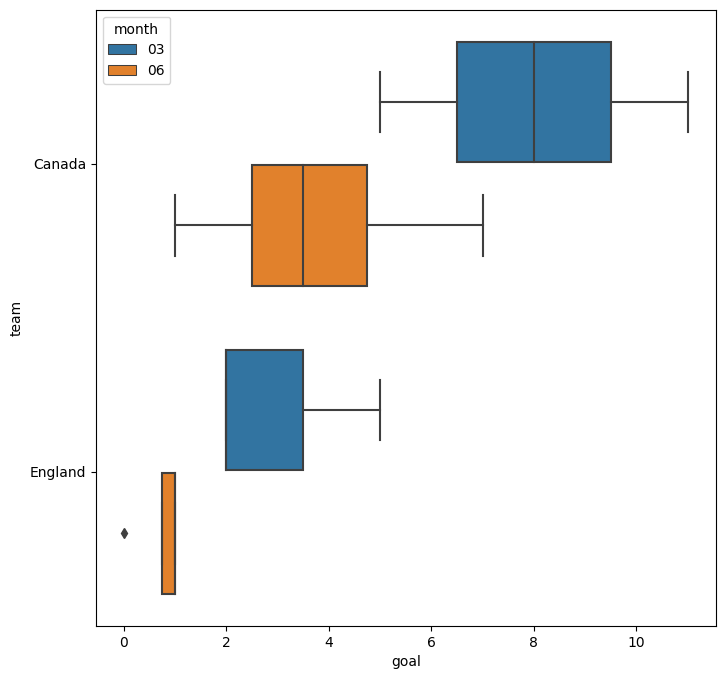

In [247]:
fig = plt.figure(figsize=(8, 8))
# sns.boxplot(x='Epithelial', y='CHR_17P_DEL', data=merged_props)
plt.rcParams.update({'font.size': 10})
sns.boxplot(x='goal', y='team', hue='month',data=perfomance_2021)
fig.savefig('2021_performance.png')